In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
with open('replies_clusters_with_predictions.pickle', 'rb') as f:
    replies_clusters = pickle.load(f)
replies_clusters = replies_clusters[replies_clusters['toxic_tokens_empty'] == 0]
replies_clusters.head()

,conversation_id,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,...,embeddings_pca,embeddings_tsne,avg_embedding_pca,avg_embedding_tsne,tweets_cluster,datetime,toxic_prediction,antivax_prediction,toxic_tokens_empty,antivax_tokens_empty
6,1030000000000000,15628274,drbloem,Vaccination Dangers http://bit.ly/54oEjD #health,[],0,0,0,['#health'],"[{'user_id': '15628274', 'username': 'drbloem'}]",...,"[0.089807294, -0.076945916, -0.060742203, -0.0...","[-6.5955834, -0.24445535]","[3.2530833890231343, -3.8364880767818645, -2.2...","[-3.920255, 6.8469424]",0,2010-01-01 03:03:23,0,1,0,0
8,1030000000000000,88865710,reasonable_hank,Sharp end of vaccination | The Daily Telegraph...,['nocompulsoryvac'],0,0,0,"['#stopavn', '#vaxfax', '#1sol', '#vaccinetimes']","[{'user_id': '88865710', 'username': 'reasonab...",...,"[0.033905577, 0.08001816, 0.15066516, 0.076626...","[9.261212, 13.295772]","[-3.9778080080169658, -1.2387839170417985, 3.2...","[-28.207369, 7.776887]",0,2010-11-07 00:36:02,0,1,0,0
7,1030000000000000,17887403,happysinger,The Sharp End of Vaccination: @nocompulsoryvac...,['nocompulsoryvac'],0,11,1,"['#stopavn', '#skeptics']","[{'user_id': '17887403', 'username': 'HappySin...",...,"[-0.0499199, -0.034067053, -0.027884655, -0.14...","[6.424397, 16.822279]","[-4.79636196862201, 0.17660501149269758, 2.510...","[-28.388243, 7.0919704]",0,2010-11-07 01:06:36,0,1,0,0
5,1120000000000000,79896423,constanthealth,Flu vaccination event raises more than $24K fo...,[],0,0,0,[],"[{'user_id': '79896423', 'username': 'constant...",...,"[-0.050425336, -0.13559175, 0.050015662, 0.127...","[28.01074, -12.579171]","[-1.3124122646398337, -0.35740021322966625, 0....","[1.8229796, -14.62932]",2,2010-11-07 06:50:01,0,0,0,0
4,1180000000000000,67735456,superdave009,Flu vaccination programme for pregnant women u...,[],0,0,0,[],"[{'user_id': '67735456', 'username': 'SUPERDAV...",...,"[0.08692184, -0.136391, 0.0139097655, 0.196331...","[29.058771, -24.126238]","[-0.8337440585171392, 0.8233614155332241, -0.1...","[1.9250319, -14.756243]",2,2010-11-07 11:11:34,0,1,0,0


In [12]:
replies_clusters

,conversation_id,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,...,embeddings_pca,embeddings_tsne,avg_embedding_pca,avg_embedding_tsne,tweets_cluster,datetime,toxic_prediction,antivax_prediction,toxic_tokens_empty,antivax_tokens_empty
6,1030000000000000,15628274,drbloem,Vaccination Dangers http://bit.ly/54oEjD #health,[],0,0,0,['#health'],"[{'user_id': '15628274', 'username': 'drbloem'}]",...,"[0.089807294, -0.076945916, -0.060742203, -0.0...","[-6.5955834, -0.24445535]","[3.2530833890231343, -3.8364880767818645, -2.2...","[-3.920255, 6.8469424]",0,2010-01-01 03:03:23,0,1,0,0
8,1030000000000000,88865710,reasonable_hank,Sharp end of vaccination | The Daily Telegraph...,['nocompulsoryvac'],0,0,0,"['#stopavn', '#vaxfax', '#1sol', '#vaccinetimes']","[{'user_id': '88865710', 'username': 'reasonab...",...,"[0.033905577, 0.08001816, 0.15066516, 0.076626...","[9.261212, 13.295772]","[-3.9778080080169658, -1.2387839170417985, 3.2...","[-28.207369, 7.776887]",0,2010-11-07 00:36:02,0,1,0,0
7,1030000000000000,17887403,happysinger,The Sharp End of Vaccination: @nocompulsoryvac...,['nocompulsoryvac'],0,11,1,"['#stopavn', '#skeptics']","[{'user_id': '17887403', 'username': 'HappySin...",...,"[-0.0499199, -0.034067053, -0.027884655, -0.14...","[6.424397, 16.822279]","[-4.79636196862201, 0.17660501149269758, 2.510...","[-28.388243, 7.0919704]",0,2010-11-07 01:06:36,0,1,0,0
5,1120000000000000,79896423,constanthealth,Flu vaccination event raises more than $24K fo...,[],0,0,0,[],"[{'user_id': '79896423', 'username': 'constant...",...,"[-0.050425336, -0.13559175, 0.050015662, 0.127...","[28.01074, -12.579171]","[-1.3124122646398337, -0.35740021322966625, 0....","[1.8229796, -14.62932]",2,2010-11-07 06:50:01,0,0,0,0
4,1180000000000000,67735456,superdave009,Flu vaccination programme for pregnant women u...,[],0,0,0,[],"[{'user_id': '67735456', 'username': 'SUPERDAV...",...,"[0.08692184, -0.136391, 0.0139097655, 0.196331...","[29.058771, -24.126238]","[-0.8337440585171392, 0.8233614155332241, -0.1...","[1.9250319, -14.756243]",2,2010-11-07 11:11:34,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48602,1080000000000000000,47074030,lecterro,You are lying. I live in EU we have mandatory ...,"['sciarpuccio', 'thedarklander', 'customdeluxe...",2,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,"[0.05201471, 0.044375177, -0.09976234, 0.09072...","[-21.607311, -15.356277]","[-0.5615677590726315, -1.3629824259284742, -2....","[-16.840807, 4.265732]",0,2019-04-09 09:34:55,0,1,0,0
48603,1080000000000000000,47074030,lecterro,You as declared leftist probably support depop...,"['sciarpuccio', 'thedarklander', 'customdeluxe...",0,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,"[-0.045209162, -0.039129417, -0.122394286, -0....","[-18.350245, 6.1286597]","[-0.5615677590726315, -1.3629824259284742, -2....","[-16.840807, 4.265732]",0,2019-04-12 17:54:23,0,1,0,0
48605,1080000000000000000,47074030,lecterro,"No, it's not proven. Vaccination is just produ...","['sciarpuccio', 'customdeluxe79', 'thedarkland...",3,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,"[-0.035899732, -0.08410108, -0.08765227, -0.04...","[-7.565072, 10.097867]","[-0.5615677590726315, -1.3629824259284742, -2....","[-16.840807, 4.265732]",0,2019-04-16 22:24:23,0,1,0,0
48609,1080000000000000000,861000000000000000,patriciamspenc2,He is the President that bailed out vaccinatio...,"['iamthewatchman3', 'craigrsawyer']",0,0,0,[],"[{'user_id': '860595938204819458', 'username':...",...,"[-0.05483665, -0.045734424, -0.07168237, -0.14...","[-17.665083, 15.848436]","[7.105819932914268, 0.12631774595847284, -0.44...","[30.488146, 0.9783122]",1,2019-06-11 18:00:04,1,1,0,0


In [9]:
with open('replies_clusters_with_RobertaSentiment.pickle', 'rb') as f:
    replies_clusters = pickle.load(f)
# replies_clusters = replies_clusters[replies_clusters['toxic_tokens_empty'] == 0]
replies_clusters['Id'] = replies_clusters['Id'].astype(int)
replies_clusters

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,conversation_id,user_id,...,degree,pageranks,eigencentrality,X,Y,Size,Color,cluster,embeddings_pca,embeddings_tsne
0,23249874,0.000,1.000,0.0,0.000,0.689378,0.291438,0.019183,1290000000000000,23249874,...,3.0,0.000003,0.000543,-119.081268,2554.743164,10.0,#000000,21.0,"[0.13828461, 0.002704288, -0.1409345, 0.020360...","[-7.760055, -5.5573025]"
1,23249874,0.000,1.000,0.0,0.000,0.689378,0.291438,0.019183,52100000000000000,23249874,...,3.0,0.000003,0.000543,-119.081268,2554.743164,10.0,#000000,21.0,"[-0.017575674, 0.020128308, 0.20078576, -0.121...","[1.3144606, 7.9656086]"
2,23249874,0.000,1.000,0.0,0.000,0.689378,0.291438,0.019183,150000000000000000,23249874,...,3.0,0.000003,0.000543,-119.081268,2554.743164,10.0,#000000,21.0,"[-0.10768987, -0.10804529, 0.06597572, 0.04415...","[29.546093, -9.904147]"
3,23249874,0.000,1.000,0.0,0.000,0.689378,0.291438,0.019183,150000000000000000,23249874,...,3.0,0.000003,0.000543,-119.081268,2554.743164,10.0,#000000,21.0,"[-0.10768989, -0.108045384, 0.065975666, 0.044...","[29.546389, -9.903836]"
4,23249874,0.000,1.000,0.0,0.000,0.689378,0.291438,0.019183,256000000000000000,23249874,...,3.0,0.000003,0.000543,-119.081268,2554.743164,10.0,#000000,21.0,"[-0.003910799, -0.034781266, -0.015546039, 0.0...","[26.030853, -11.660152]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,47074030,0.058,0.942,0.0,-0.296,0.743731,0.236111,0.020159,1080000000000000000,47074030,...,6.0,0.000003,0.000543,467.289398,2323.867920,10.0,#000000,18.0,"[-0.15554634, -0.04518171, -0.073667146, -0.07...","[48.62997, -3.1298435]"
51296,47074030,0.058,0.942,0.0,-0.296,0.743731,0.236111,0.020159,1080000000000000000,47074030,...,6.0,0.000003,0.000543,467.289398,2323.867920,10.0,#000000,18.0,"[0.051780716, -0.02539958, 0.0145899495, -0.25...","[-27.433193, 5.887075]"
51297,47074030,0.058,0.942,0.0,-0.296,0.743731,0.236111,0.020159,1080000000000000000,47074030,...,6.0,0.000003,0.000543,467.289398,2323.867920,10.0,#000000,18.0,"[0.05201471, 0.044375177, -0.09976234, 0.09072...","[-21.607311, -15.356277]"
51298,47074030,0.058,0.942,0.0,-0.296,0.743731,0.236111,0.020159,1080000000000000000,47074030,...,6.0,0.000003,0.000543,467.289398,2323.867920,10.0,#000000,18.0,"[-0.045209162, -0.039129417, -0.122394286, -0....","[-18.350245, 6.1286597]"


In [10]:
replies_clusters[['pos', 'neg', 'roberta_neg', 'roberta_pos', 'tweet']]

,pos,neg,roberta_neg,roberta_pos,tweet
0,0.0,0.000,0.689378,0.019183,Vaccines and the diseases vaccination can prev...
1,0.0,0.000,0.689378,0.019183,Vaccination and the killers of yesterday now o...
2,0.0,0.000,0.689378,0.019183,Learning valuable public health lessons from i...
3,0.0,0.000,0.689378,0.019183,Learning valuable public health lessons from i...
4,0.0,0.000,0.689378,0.019183,ACP: Make flu vaccination a team effort http:...
...,...,...,...,...,...
51295,0.0,0.058,0.743731,0.020159,You demonstrated nothing and especially not la...
51296,0.0,0.058,0.743731,0.020159,And what is fascism? I will explain. For you l...
51297,0.0,0.058,0.743731,0.020159,You are lying. I live in EU we have mandatory ...
51298,0.0,0.058,0.743731,0.020159,You as declared leftist probably support depop...


In [186]:
straw_man_predictions = pd.read_csv('straw_man_predictions.csv', lineterminator='\n', index_col=0)
straw_man_predictions

,user_id,text,predicted_label
0,23249874,Vaccines and the diseases vaccination can prev...,1
1,16854311,@electric589 @kevinmd Vaccines and the disease...,1
2,11274452,"For autism, vaccination is the simple answer t...",0
3,17054920,sitfu.com Russian Activist Disappears After Ex...,1
4,67735456,Flu vaccination programme for pregnant women u...,1
...,...,...,...
40627,419555327,Haha. I've also noted the Orange Blob's tweets...,0
40628,874000000000000000,"Re: ""Everyone is entitled to their own opinion...",1
40629,419555327,"Elvis asked me to say ""hi"" to you. In other ne...",1
40630,964000000000000000,Quatre fois plus de cas de rougeole dans le mo...,0


In [70]:
classifiers_predictions = pd.read_csv('classifiers_predictions.csv')
classifiers_predictions

,conversation_id,text,straw_man_pred,ad_hom_pred
0,1030000000000000,15628274: Vaccination Dangers http://bit.ly/5...,1,1
1,35600000000000000,47514193: Reading Brain Damage Caused by Vacci...,0,0
2,2040000000000000,25929374: Gardasil HPV Vaccine Stopping Genita...,1,1
3,2370000000000000,47514193: Ghana: Public Flee From H1N1 Vaccina...,0,1
4,2770000000000000,47514193: Swine flu by stealth or vaccination ...,0,1
...,...,...,...,...
1162,996000000000000000,1634556649: A decline in pneumococcal pneumoni...,1,0
1163,997000000000000000,67690947: #Ebola en #RDC🇨🇩 Dernière mise à jo...,1,1
1164,998000000000000000,57703513: La #coqueluche. Contagieuse. Évitabl...,1,0
1165,999000000000000000,57703513: La meilleure façon de se protéger co...,1,1


In [87]:
replies_clusters = replies_clusters.merge(classifiers_predictions[['conversation_id',
                                                                   'straw_man_pred',
                                                                   'ad_hom_pred']],
                                           on='conversation_id',
                                           how='left')
replies_clusters = replies_clusters.dropna(subset=['straw_man_pred', 'ad_hom_pred'], axis=0)
replies_clusters['straw_man_pred'] = replies_clusters['straw_man_pred'].astype(int)
replies_clusters['ad_hom_pred'] = replies_clusters['ad_hom_pred'].astype(int)

replies_clusters = replies_clusters.rename(columns={'straw_man_pred': 'straw_man_conv',
                                                    'ad_hom_pred': 'ad_hom_conv'})

In [71]:
def get_group_characteristic(df, group, column, func=np.mean):
    return df.groupby(group)[column].agg(func)

In [167]:
columns = ['Eccentricity',
           'closnesscentrality',
           'harmonicclosnesscentrality',
           'betweenesscentrality',
           'strongcompnum',
           'indegree',
           'outdegree',
           'pageranks',
           'toxic_prediction',
           'straw_man_conv',
           'ad_hom_conv']

users_characteristics = pd.DataFrame(columns=['user_id'])
users_characteristics['user_id'] = replies_clusters['user_id'].unique()

conv_characteristics = pd.DataFrame(columns=['conversation_id'])
conv_characteristics['conversation_id'] = replies_clusters['conversation_id'].unique()

tweets_cluster_characteristics = pd.DataFrame(columns=['tweets_cluster'])
tweets_cluster_characteristics['tweets_cluster'] = replies_clusters['tweets_cluster'].unique()

cluster_characteristics = pd.DataFrame(columns=['cluster'])
cluster_characteristics['cluster'] = replies_clusters['cluster'].unique()

users_characteristics = users_characteristics.merge(replies_clusters.drop_duplicates(subset=['user_id'])
                            [['user_id', 'cluster', 'tweets_cluster']], on='user_id', how='right')

for column in columns:
    users_characteristics = users_characteristics.merge(
                get_group_characteristic(replies_clusters, 'user_id', column),
                on='user_id',
                how='left'
            )

    conv_characteristics = conv_characteristics.merge(
                get_group_characteristic(replies_clusters, 'conversation_id', column),
                on='conversation_id',
                how='left'
            )
    tweets_cluster_characteristics = tweets_cluster_characteristics.merge(
        get_group_characteristic(replies_clusters, 'tweets_cluster', column),
        on='tweets_cluster',
        how='left'
    )
    cluster_characteristics = cluster_characteristics.merge(
        get_group_characteristic(replies_clusters, 'cluster', column),
        on='cluster',
        how='left'
    )

In [183]:
import itertools
clusters = list(cluster_characteristics['cluster'].unique())
combinations = list(itertools.combinations(clusters, 2))

alpha = 0.05

for combination in combinations:
    cl1, cl2 = combination
    group1 = users_characteristics.query('cluster == @cl1')['toxic_prediction'].values
    group2 = users_characteristics.query('cluster == @cl2')['toxic_prediction'].values
    result = stats.mannwhitneyu(group1, group2, alternative='two-sided')[1] >= alpha
    print(f'Clusters {cl1} and {cl2}')
    print('Mean value is the same' if result else 'Different mean values')
    print()

Clusters 35 and 18
Mean value is the same

Clusters 35 and 21
Mean value is the same

Clusters 35 and 28
Differen mean values

Clusters 35 and 6
Differen mean values

Clusters 35 and 19
Mean value is the same

Clusters 18 and 21
Differen mean values

Clusters 18 and 28
Differen mean values

Clusters 18 and 6
Differen mean values

Clusters 18 and 19
Mean value is the same

Clusters 21 and 28
Differen mean values

Clusters 21 and 6
Mean value is the same

Clusters 21 and 19
Differen mean values

Clusters 28 and 6
Differen mean values

Clusters 28 and 19
Differen mean values

Clusters 6 and 19
Differen mean values



In [195]:
cluster_characteristics[['cluster', 'toxic_prediction']]

,cluster,toxic_prediction
0,35,0.143468
1,18,0.199829
2,21,0.145315
3,28,0.131909
4,6,0.120542
5,19,0.196871


35, 21,

In [184]:
clusters = list(tweets_cluster_characteristics['tweets_cluster'].unique())
combinations = list(itertools.combinations(clusters, 2))

alpha = 0.05

for combination in combinations:
    cl1, cl2 = combination
    group1 = users_characteristics.query('tweets_cluster == @cl1')['toxic_prediction'].values
    group2 = users_characteristics.query('tweets_cluster == @cl2')['toxic_prediction'].values
    result = stats.mannwhitneyu(group1, group2, alternative='two-sided')[1] >= alpha
    print(f'Clusters {cl1} and {cl2}')
    print('Mean value is the same' if result else 'Differen mean values')
    print()

Clusters 0 and 2
Mean value is the same

Clusters 0 and 1
Differen mean values

Clusters 0 and 5
Differen mean values

Clusters 0 and 3
Differen mean values

Clusters 0 and 4
Differen mean values

Clusters 2 and 1
Differen mean values

Clusters 2 and 5
Differen mean values

Clusters 2 and 3
Differen mean values

Clusters 2 and 4
Differen mean values

Clusters 1 and 5
Mean value is the same

Clusters 1 and 3
Differen mean values

Clusters 1 and 4
Differen mean values

Clusters 5 and 3
Differen mean values

Clusters 5 and 4
Differen mean values

Clusters 3 and 4
Mean value is the same



In [197]:
tweets_cluster_characteristics[['tweets_cluster', 'toxic_prediction']]

,tweets_cluster,toxic_prediction
0,0,0.209837
1,2,0.193687
2,1,0.127488
3,5,0.116218
4,3,0.085890
5,4,0.147794


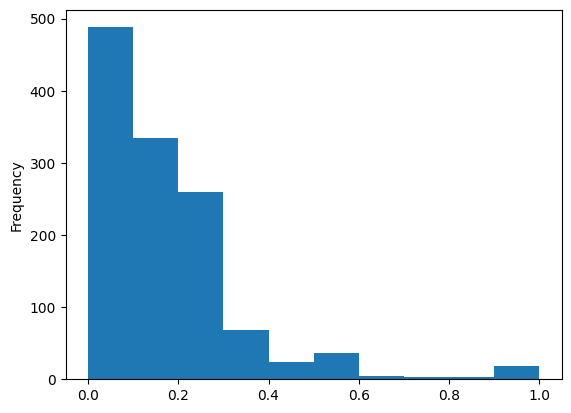

In [193]:
users_characteristics['toxic_prediction'].plot.hist(bins=10)
plt.savefig('toxicity.png')

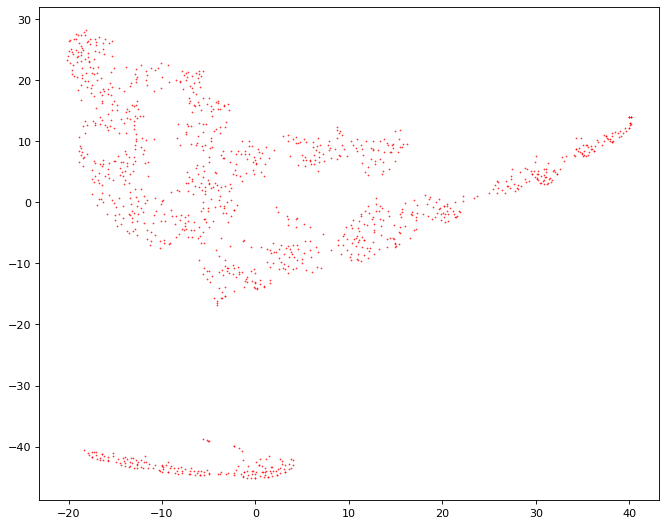

In [132]:
tsne = TSNE(n_components=2, perplexity=50)
tsne.fit(conv_characteristics.drop(columns=['conversation_id']))
conv_vectors = tsne.embedding_
conv_characteristics['X'] = conv_vectors[:, 0]
conv_characteristics['Y'] = conv_vectors[:, 1]
figure(figsize=(10, 8), dpi=80)
plt.scatter(conv_characteristics['X'], conv_characteristics['Y'], c='r', s=0.2)
plt.show()

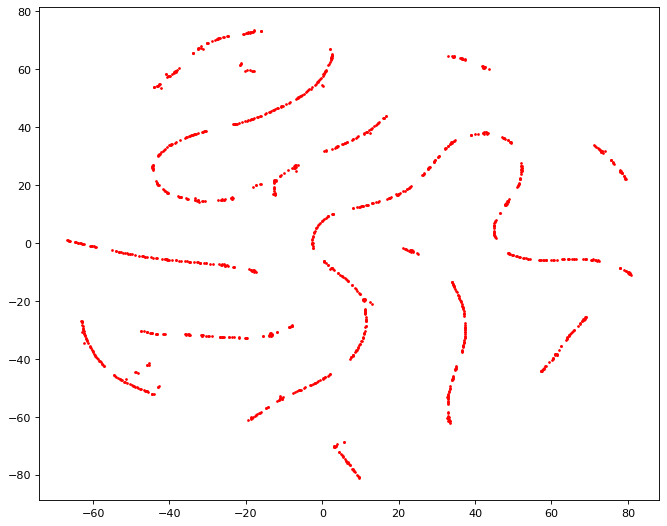

In [150]:
tsne = TSNE(n_components=2, perplexity=10)
tsne.fit(users_characteristics.drop(columns=['user_id', 'cluster']))
users_vectors = tsne.embedding_
users_characteristics['X'] = users_vectors[:, 0]
users_characteristics['Y'] = users_vectors[:, 1]
figure(figsize=(10, 8), dpi=80)
plt.scatter(users_vectors[:, 0], users_vectors[:, 1], c='r', s=2)
plt.show()

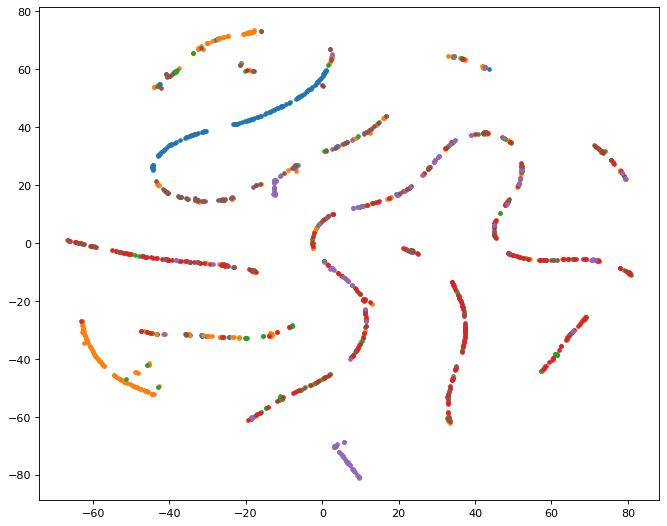

In [157]:
figure(figsize=(10, 8), dpi=80)
for cluster in users_characteristics['cluster'].unique():
    users_cluster = users_characteristics.query('cluster == @cluster')
    plt.scatter(users_cluster['X'], users_cluster['Y'], s=10)